
## 🌟 Exercise 1: Calculating Required Sample Size
You are planning an A/B test to evaluate the impact of a new email subject line on the open rate. Based on past data, you expect a small effect size of 0.3 (an increase from 20% to 23% in the open rate). You aim for an 80% chance (power = 0.8) of detecting this effect if it exists, with a 5% significance level (α = 0.05).

Calculate the required sample size per group using Python’s statsmodels library.
What sample size is needed for each group to ensure your test is properly powered?


## 🌟 Exercise 2: Understanding the Relationship Between Effect Size and Sample Size
Using the same A/B test setup as in Exercise 1, you want to explore how changing the expected effect size impacts the required sample size.

Calculate the required sample size for the following effect sizes: 0.2, 0.4, and 0.5, keeping the significance level and power the same.
How does the sample size change as the effect size increases? Explain why this happens.


## 🌟 Exercise 3: Exploring the Impact of Statistical Power
Imagine you are conducting an A/B test where you expect a small effect size of 0.2. You initially plan for a power of 0.8 but wonder how increasing or decreasing the desired power level impacts the required sample size.

Calculate the required sample size for power levels of 0.7, 0.8, and 0.9, keeping the effect size at 0.2 and significance level at 0.05.
Question: How does the required sample size change with different levels of statistical power? Why is this understanding important when designing A/B tests?


## 🌟 Exercise 4: Implementing Sequential Testing
You are running an A/B test on two versions of a product page to increase the purchase rate. You plan to monitor the results weekly and stop the test early if one version shows a significant improvement.

Define your stopping criteria.
Decide how you would implement sequential testing in this scenario.
At the end of week three, Version B has a p-value of 0.02. What would you do next?


## 🌟 Exercise 5: Applying Bayesian A/B Testing
You’re testing a new feature in your app, and you want to use a Bayesian approach. Initially, you believe the new feature has a 50% chance of improving user engagement. After collecting data, your analysis suggests a 65% probability that the new feature is better.

Describe how you would set up your prior belief.
After collecting data, how does the updated belief (posterior distribution) influence your decision?
What would you do if the posterior probability was only 55%?


## 🌟 Exercise 6: Implementing Adaptive Experimentation
You’re running a test with three different website layouts to increase user engagement. Initially, each layout gets 33% of the traffic. After the first week, Layout C shows higher engagement.

Explain how you would adjust the traffic allocation after the first week.
Describe how you would continue to adapt the experiment in the following weeks.
What challenges might you face with adaptive experimentation, and how would you address them?

In [ ]:
You are planning an A/B test to evaluate the impact of a new email subject line on the open rate. Based on past data, you expect a small effect size of 0.3 (an increase from 20% to 23% in the open rate). You aim for an 80% chance (power = 0.8) of detecting this effect if it exists, with a 5% significance level (α = 0.05).

Calculate the required sample size per group using Python’s statsmodels library.
What sample size is needed for each group to ensure your test is properly powered?

In [1]:
from statsmodels.stats.power import tt_ind_solve_power
effect_size = 0.3  # Small effect size
alpha = 0.05       # Significance level
power = 0.8        # Power of the test
ratio = 1          # Equal group sizes

sample_size_per_group = tt_ind_solve_power(effect_size=effect_size, 
                                           alpha=alpha, 
                                           power=power, 
                                           ratio=ratio, 
                                           alternative='two-sided')

print(f"Required sample size per group: {sample_size_per_group:.2f}")

Required sample size per group: 175.38


Using the same A/B test setup as in Exercise 1, you want to explore how changing the expected effect size impacts the required sample size.

Calculate the required sample size for the following effect sizes: 0.2, 0.4, and 0.5, keeping the significance level and power the same.
How does the sample size change as the effect size increases? Explain why this happens.


In [6]:
from statsmodels.stats.power import tt_ind_solve_power
effect_size = [0.2, 0.4, 0.5]
for size in effect_size:
    sample_size_per_group = tt_ind_solve_power(effect_size=size,
                                                  alpha=0.05,
                                                  power=0.8,
                                                  ratio=1,
                                                  alternative='two-sided')
    print(f"Effect size: {size}, Required sample size per group: {sample_size_per_group:.2f}")


Effect size: 0.2, Required sample size per group: 393.41
Effect size: 0.4, Required sample size per group: 99.08
Effect size: 0.5, Required sample size per group: 63.77


Imagine you are conducting an A/B test where you expect a small effect size of 0.2. You initially plan for a power of 0.8 but wonder how increasing or decreasing the desired power level impacts the required sample size.

Calculate the required sample size for power levels of 0.7, 0.8, and 0.9, keeping the effect size at 0.2 and significance level at 0.05.
Question: How does the required sample size change with different levels of statistical power? Why is this understanding important when designing A/B tests?


In [8]:
from statsmodels.stats.power import tt_ind_solve_power
power = [0.7,0.8, 0.9]
for p in power:
    sample_size_per_group = tt_ind_solve_power(effect_size=0.2, 
                                           alpha=0.05, 
                                           power=p, 
                                           ratio=1, 
                                           alternative='two-sided')
    print(f"Required sample size per group: {sample_size_per_group:.2f}")

Required sample size per group: 309.56
Required sample size per group: 393.41
Required sample size per group: 526.33


You are running an A/B test on two versions of a product page to increase the purchase rate. You plan to monitor the results weekly and stop the test early if one version shows a significant improvement.

Define your stopping criteria.
Decide how you would implement sequential testing in this scenario.
At the end of week three, Version B has a p-value of 0.02. What would you do next?

In [9]:
from statsmodels.stats.multitest import multipletests
import numpy as np

# Define parameters
alpha = 0.05  # Total significance level
n_looks = 3   # Number of planned looks
p_values = [0.1, 0.03, 0.02]  # Example p-values from sequential tests

# Adjust significance thresholds using Bonferroni correction
adjusted_alpha = alpha / n_looks  # Bonferroni threshold for each look

# Apply adjustment to p-values
results = multipletests(p_values, alpha=alpha, method='bonferroni')

# Check if significant at any look
for i, (p_val, reject) in enumerate(zip(p_values, results[0])):
    print(f"Look {i+1}: p-value={p_val}, reject null hypothesis={reject}")

# Stop the test if any hypothesis is rejected
if any(results[0]):
    print("Stop the test: a significant difference is detected.")
else:
    print("Continue the test: no significant difference yet.")

Look 1: p-value=0.1, reject null hypothesis=False
Look 2: p-value=0.03, reject null hypothesis=False
Look 3: p-value=0.02, reject null hypothesis=False
Continue the test: no significant difference yet.


You’re testing a new feature in your app, and you want to use a Bayesian approach. Initially, you believe the new feature has a 50% chance of improving user engagement. After collecting data, your analysis suggests a 65% probability that the new feature is better.

Describe how you would set up your prior belief.
After collecting data, how does the updated belief (posterior distribution) influence your decision?
What would you do if the posterior probability was only 55%?


In [ ]:
#In Bayesian analysis, the prior belief represents your initial assumption about the probability of an outcome, before collecting data. For this scenario:
# Initial belief: You assign a 50% probability to the new feature improving user engagement, indicating a neutral stance (you are equally likely to believe the feature is better or not better).
# Prior distribution: You could use a Beta distribution because it's suitable for modeling probabilities. A common choice for a neutral prior is Beta(1,1) which is a uniform distribution reflecting no strong prior evidence.

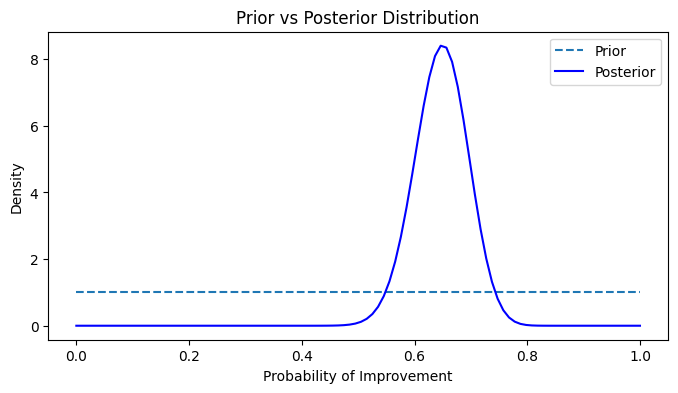

Posterior Probability of Improvement: 99.87%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define prior (neutral belief)
alpha_prior = 1
beta_prior = 1

# Observed data (e.g., 65 successes out of 100 trials)
successes = 65
trials = 100
alpha_post = alpha_prior + successes
beta_post = beta_prior + trials - successes

# Define the posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

# Plot the prior and posterior
plt.figure(figsize=(8, 4))
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label="Prior", linestyle="--")
plt.plot(x, posterior, label="Posterior", color="blue")
plt.title("Prior vs Posterior Distribution")
plt.xlabel("Probability of Improvement")
plt.ylabel("Density")
plt.legend()
plt.show()

# Calculate the posterior probability that the feature is better than baseline
prob_improvement = 1 - beta.cdf(0.5, alpha_post, beta_post)
print(f"Posterior Probability of Improvement: {prob_improvement:.2%}")

You’re running a test with three different website layouts to increase user engagement. Initially, each layout gets 33% of the traffic. After the first week, Layout C shows higher engagement.

Explain how you would adjust the traffic allocation after the first week.
- Adjusting Traffic Allocation After the First Week with adaptive experimentation where you dynamically allocate more traffic to the better-performing layouts.

Describe how you would continue to adapt the experiment in the following weeks.
- You would need to continue monitoring engagement, make reallocations when necessary based on updated performance metrics, account for variability, and finally stop the experiment according to clear criteria.

What challenges might you face with adaptive experimentation, and how would you address them?
-  Bias in results, users might notice changes in layout and adjust behavior, introducing bias.
Solution: Use randomized assignment to reduce bias and rotate layouts for returning users.